## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cf8ouYU70K8o0aaWukB5")
project = rf.workspace("kiwi-nan-spmuj").project("pepsi-sptlc")
version = project.version(1)
dataset = version.download("yolov8")



In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pepsi-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

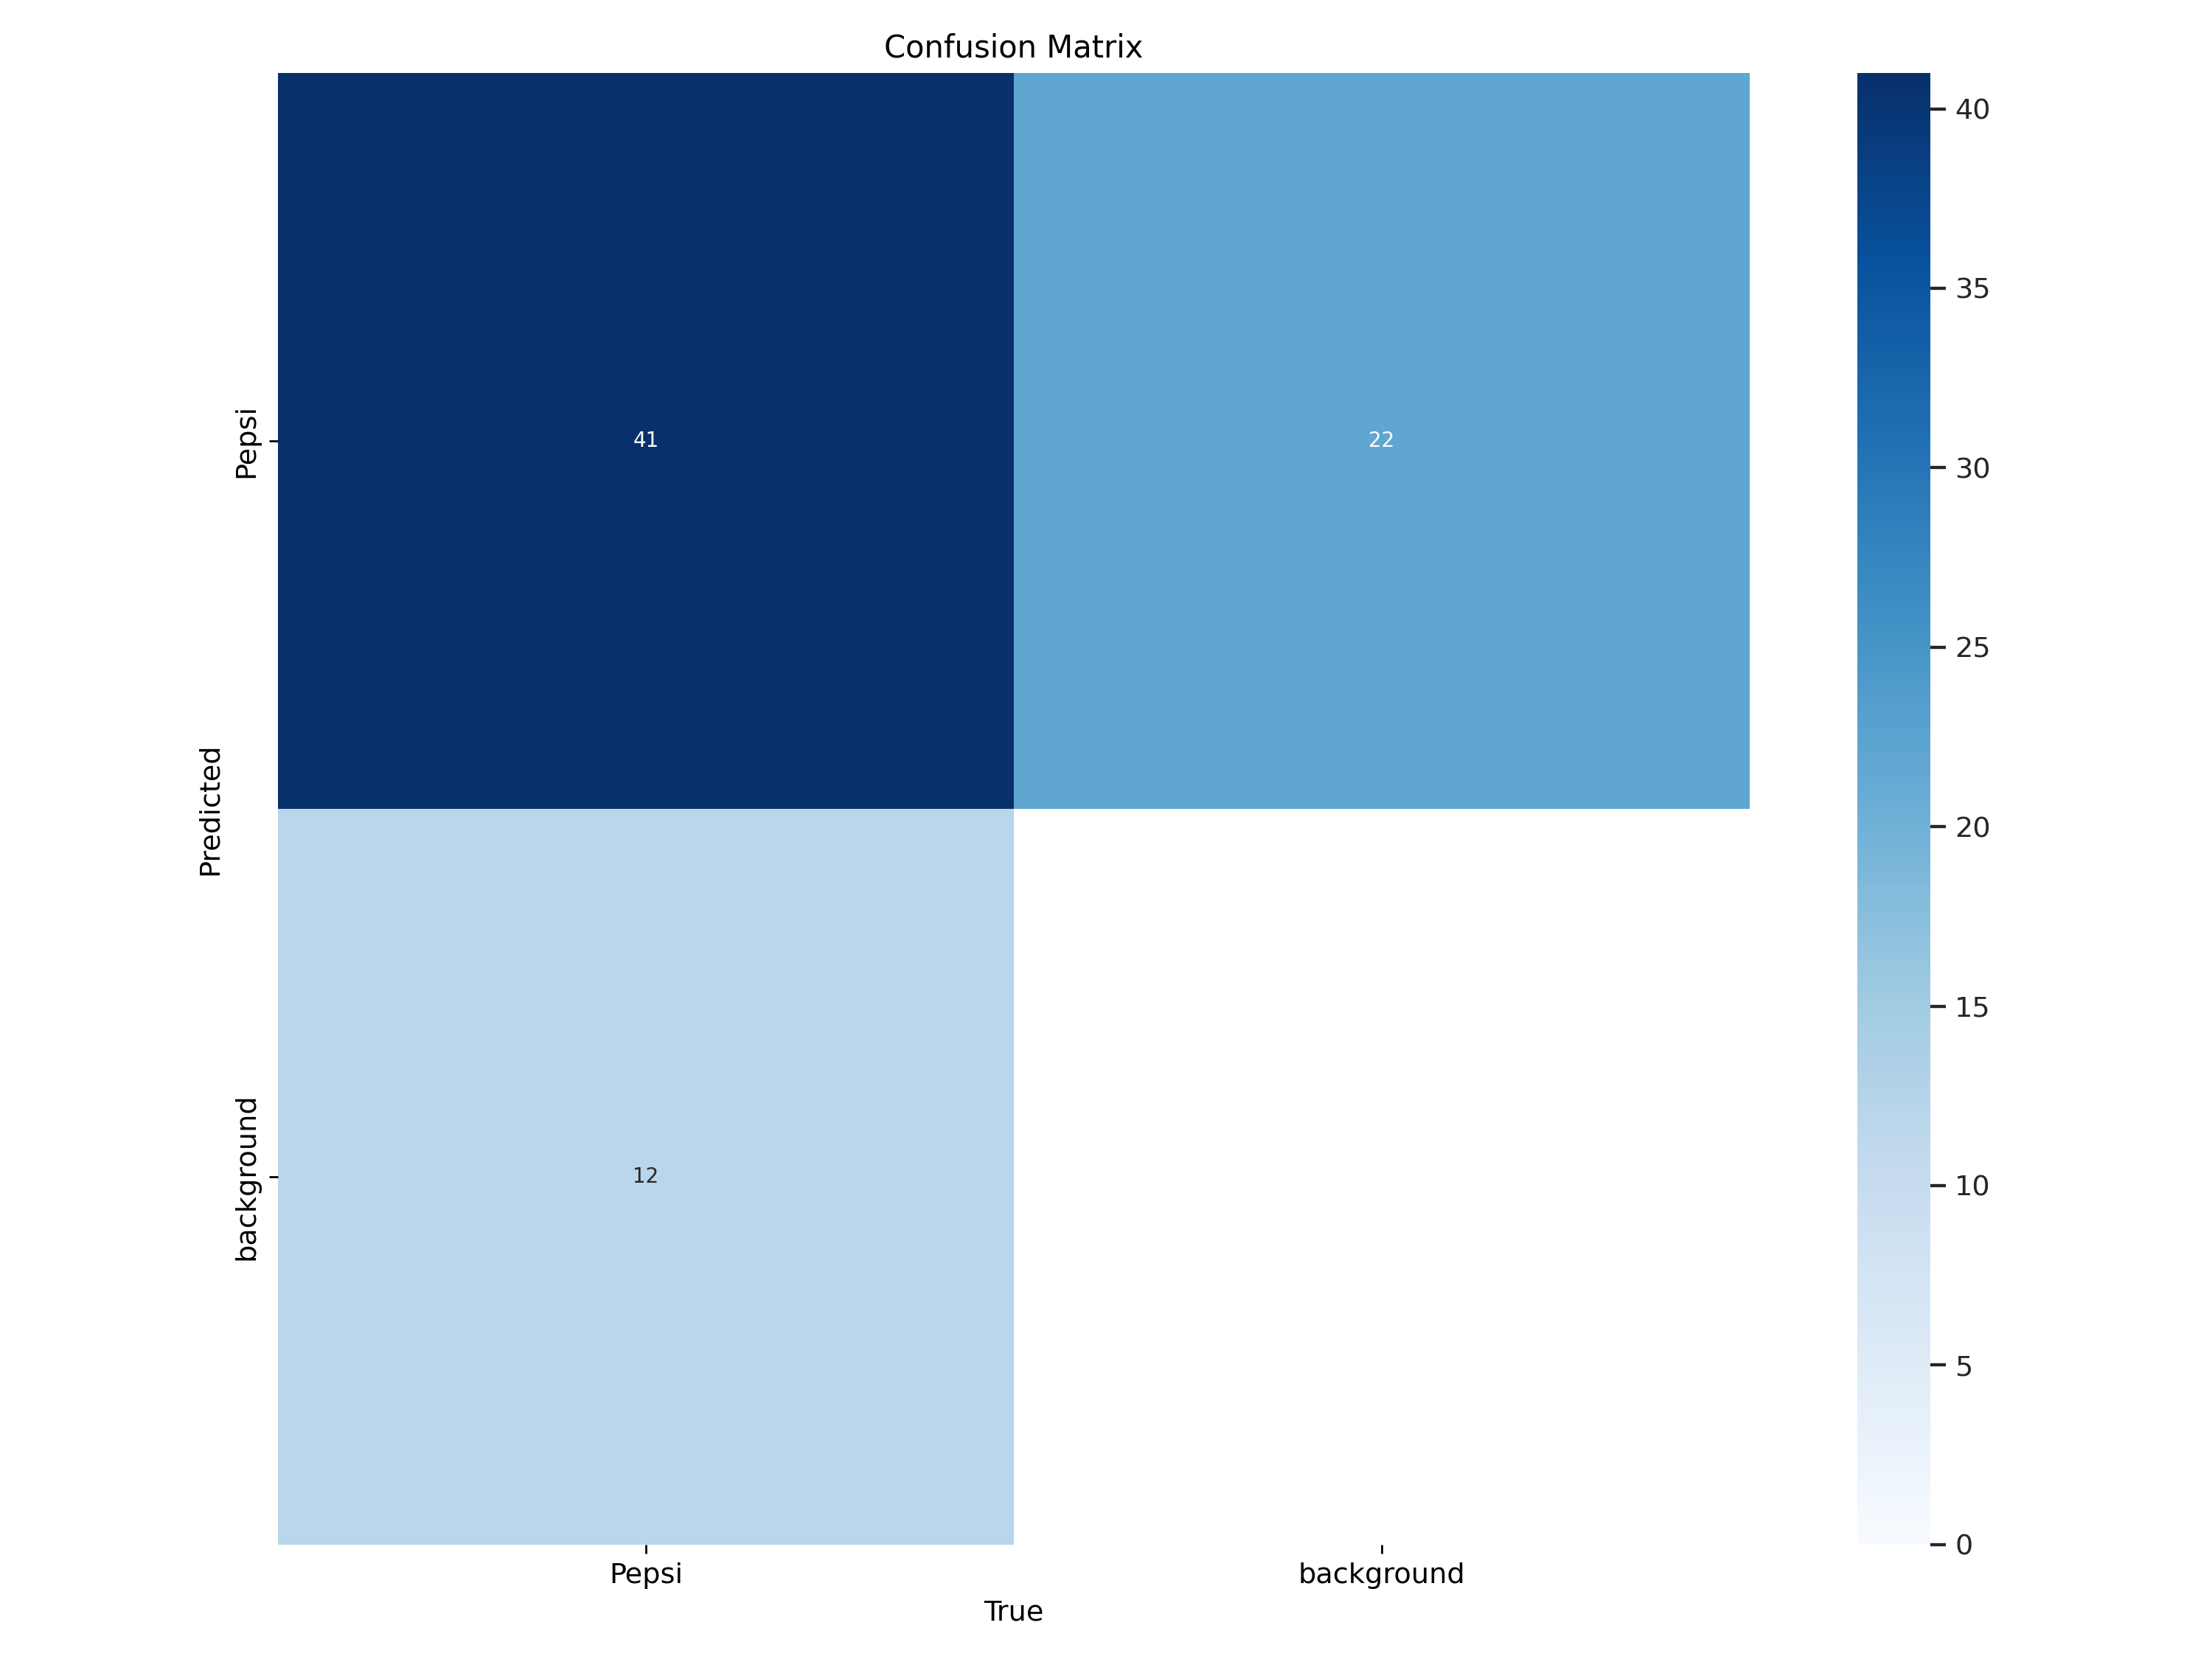

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

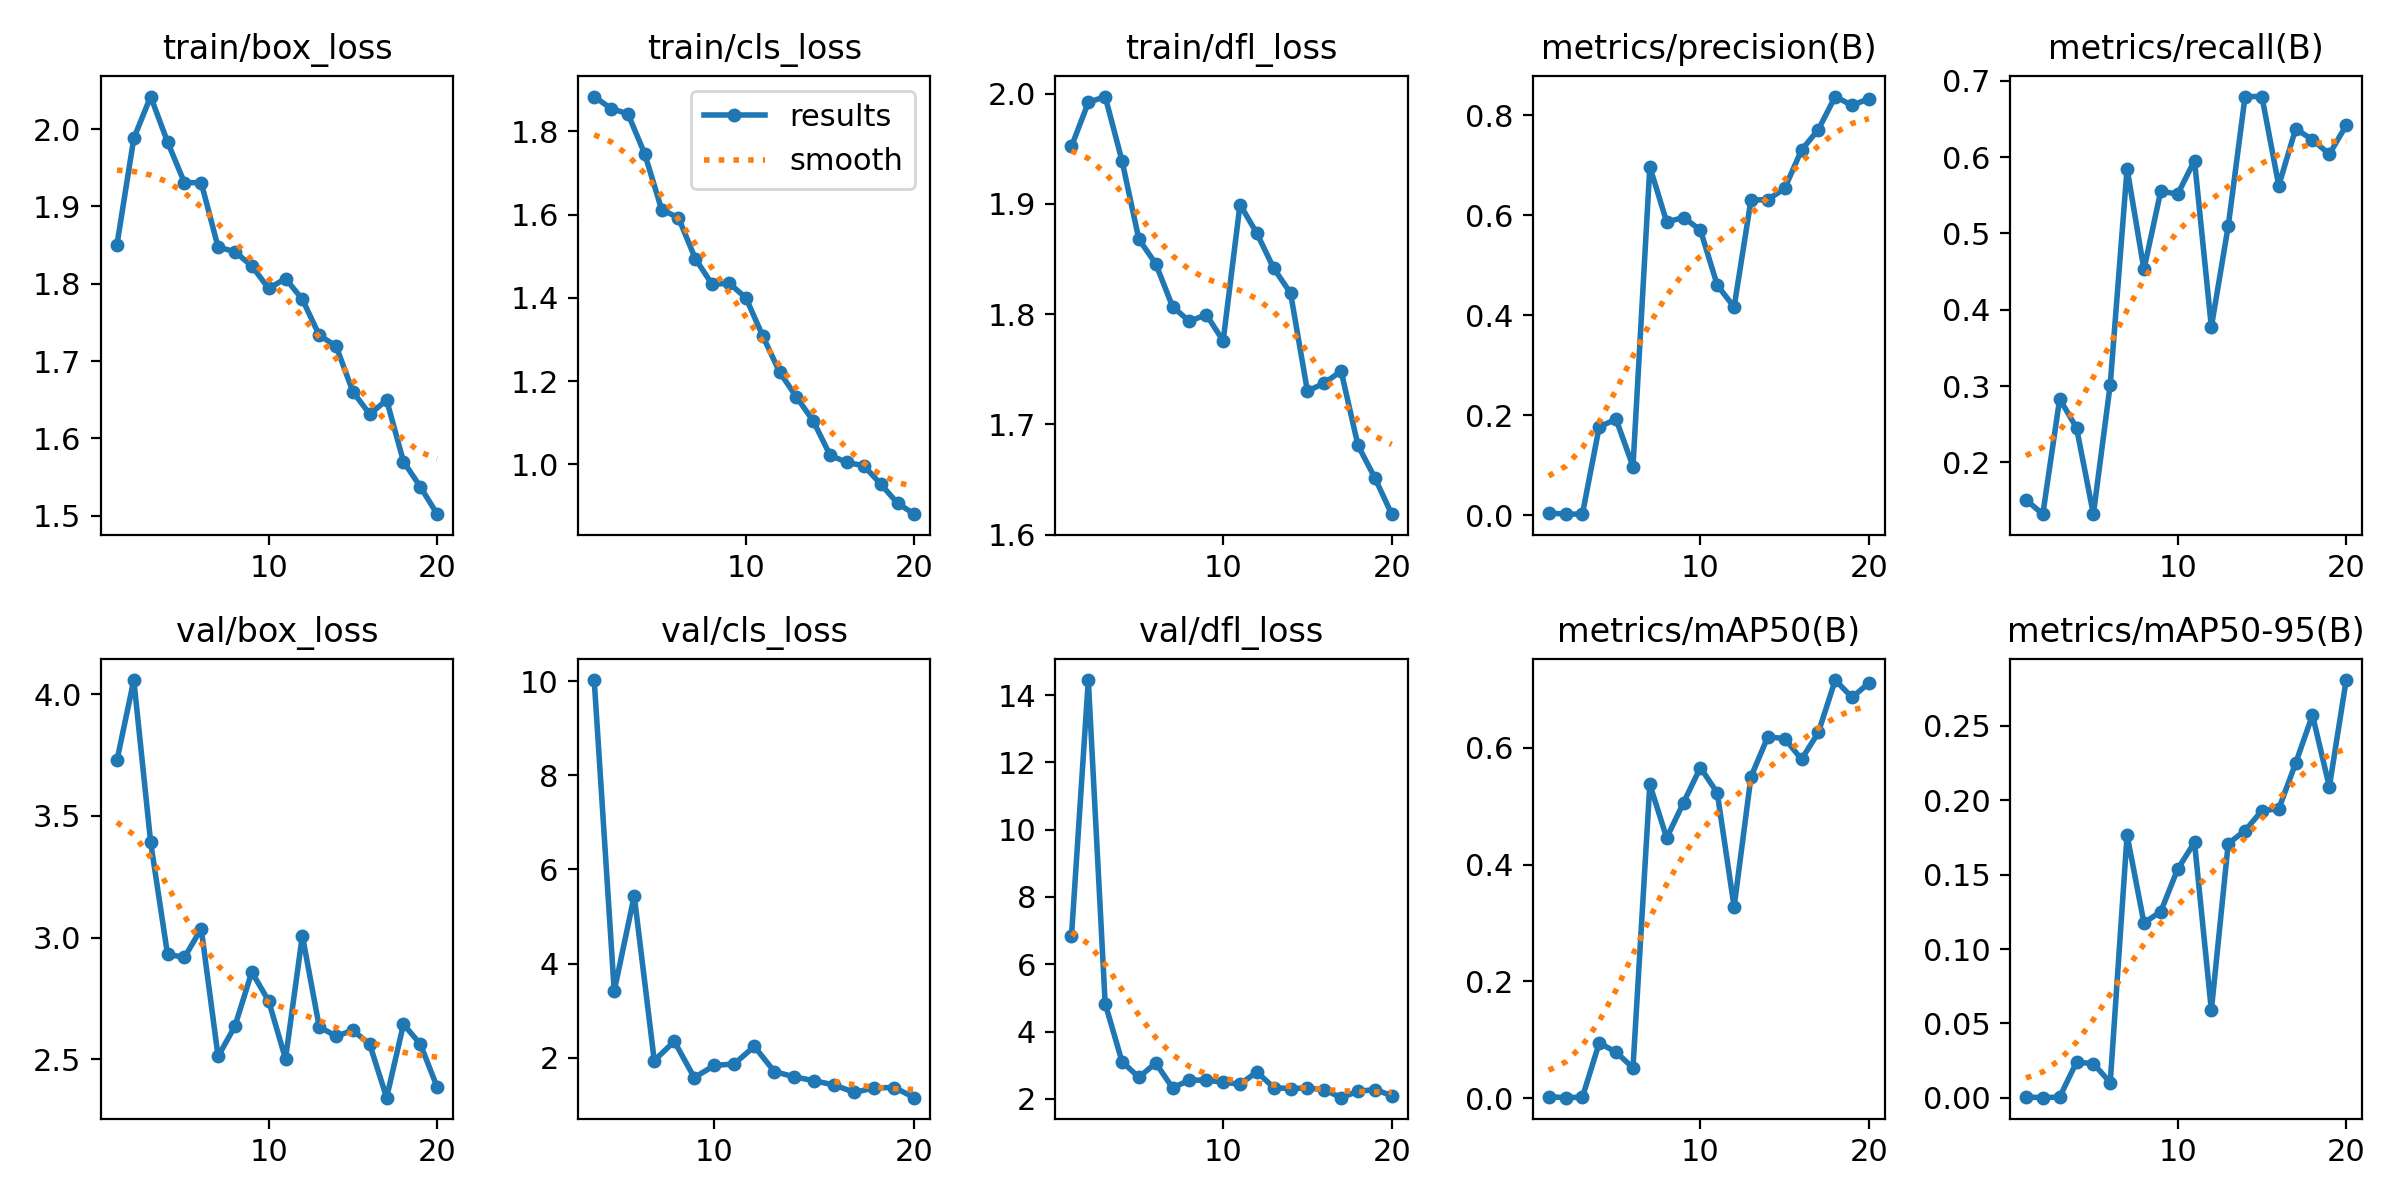

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pepsi-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.04s/it]
                   all         40         53      0.833      0.642      0.712      0.286
Speed: 3.5ms preprocess, 33.3ms inference, 0.0ms loss, 18.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/20 /content/Pepsi-1/test/images/0_Jackie-Page_jpg.rf.f43899051664961eb0318d8b8ce30391.jpg: 640x640 6 Pepsis, 37.1ms
image 2/20 /content/Pepsi-1/test/images/1000_F_388743155_9Sm33N4mYXSqyqP8PlYr4M6My4RqiI9i_jpg.rf.94d91523ecabc8364d99844f2b8f5da0.jpg: 640x640 1 Pepsi, 37.1ms
image 3/20 /content/Pepsi-1/test/images/1000_F_388921642_WaNmYMe2hT9e0eSPpz92qexl9Wlc7QaT_jpg.rf.b96ee7ec2fef7a1dfab240a8d7486d68.jpg: 640x640 1 Pepsi, 37.1ms
image 4/20 /content/Pepsi-1/test/images/1000_F_388922122_uYoRmxTgSAXuSoLZ1aAxmXGo10dgvEfg_jpg.rf.15c8921d35a991cc5ab8c60f5a890fc2.jpg: 640x640 1 Pepsi, 37.1ms
image 5/20 /content/Pepsi-1/test/images/1000_F_425410983_LWop5LNxdd0I0dEm1Plf53mJcHdAPP5a_jpg.rf.31a498cc8a7994352ac969d2f2e3ec8d.jpg: 640x640 1 Pepsi, 37.1ms
image 6/20 /content/Pepsi-1/test/images/1000_F_431153816_YCQLtLr3KgDgXf

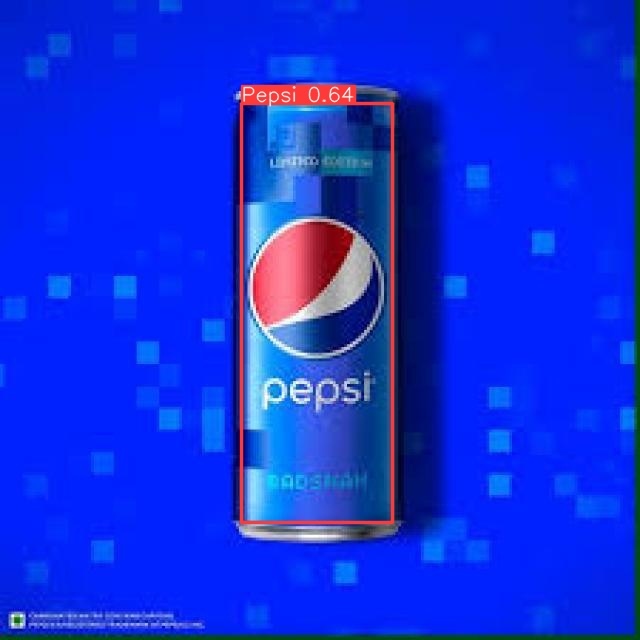

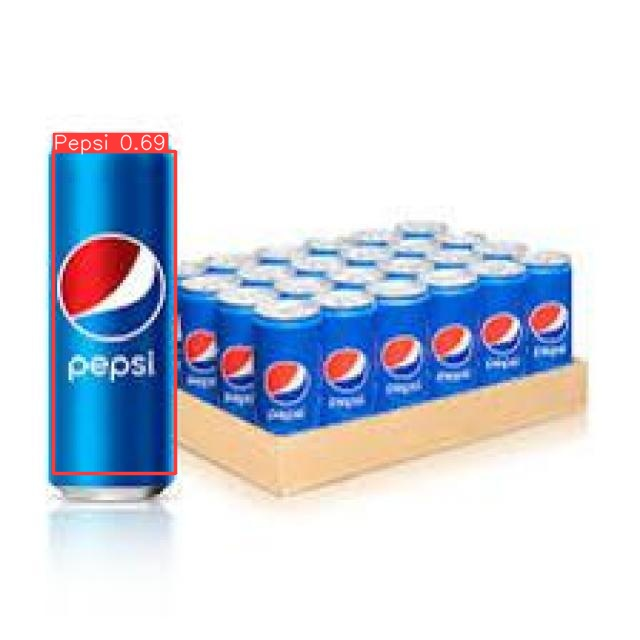

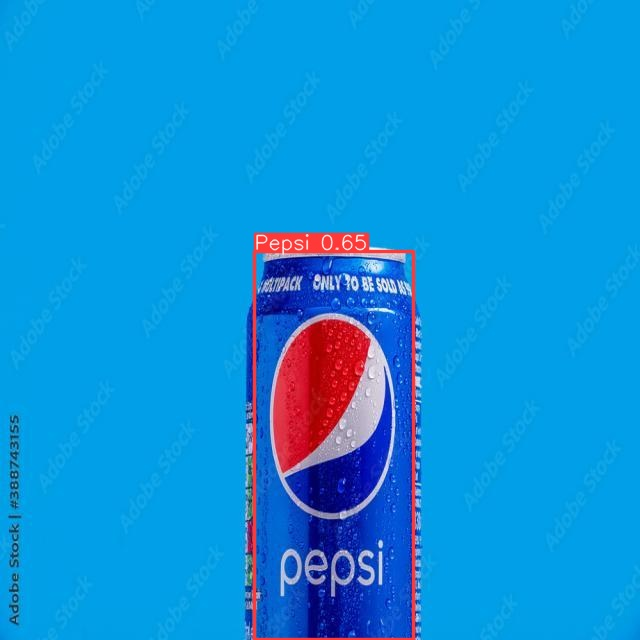

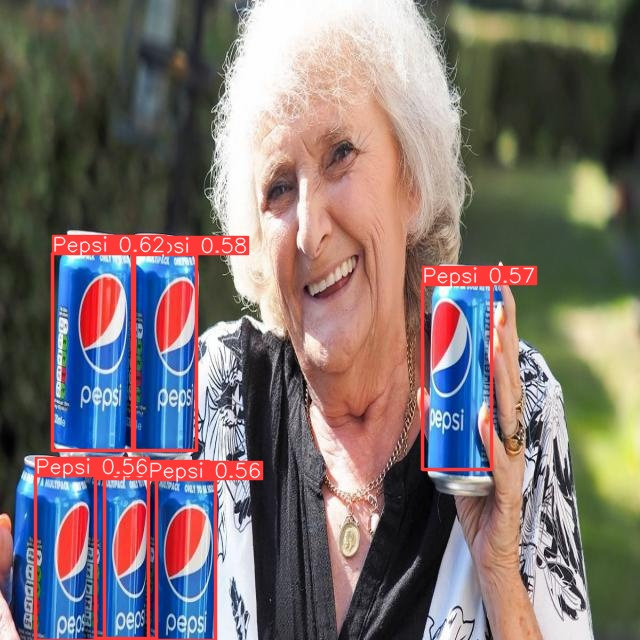

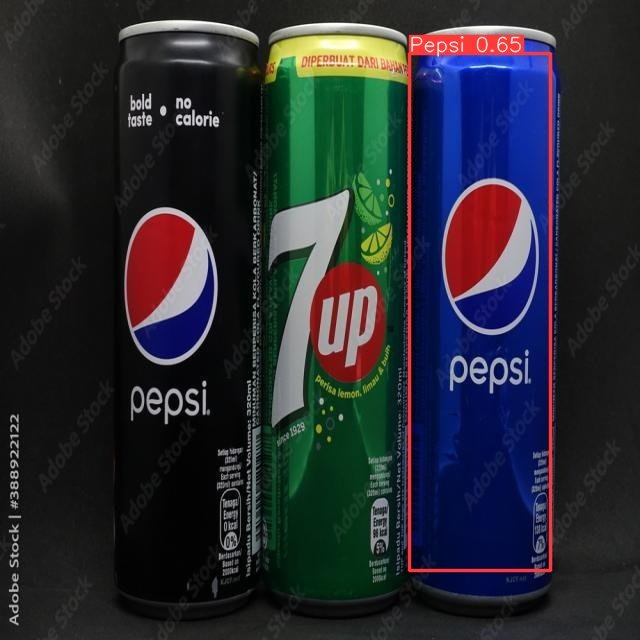

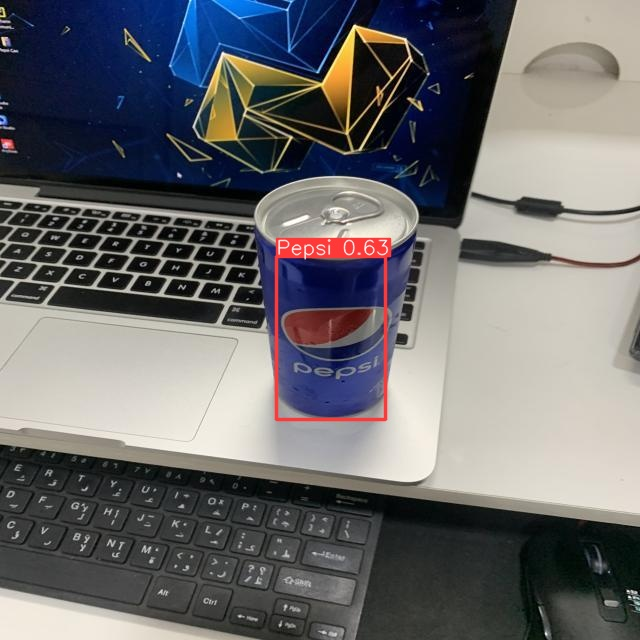

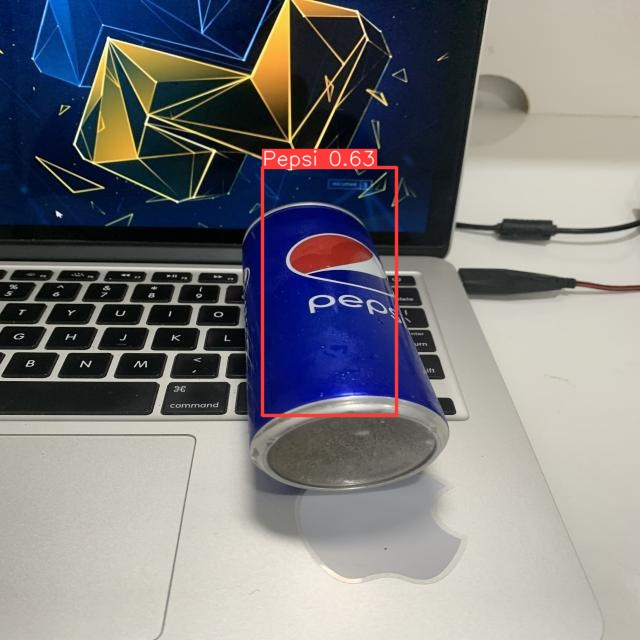

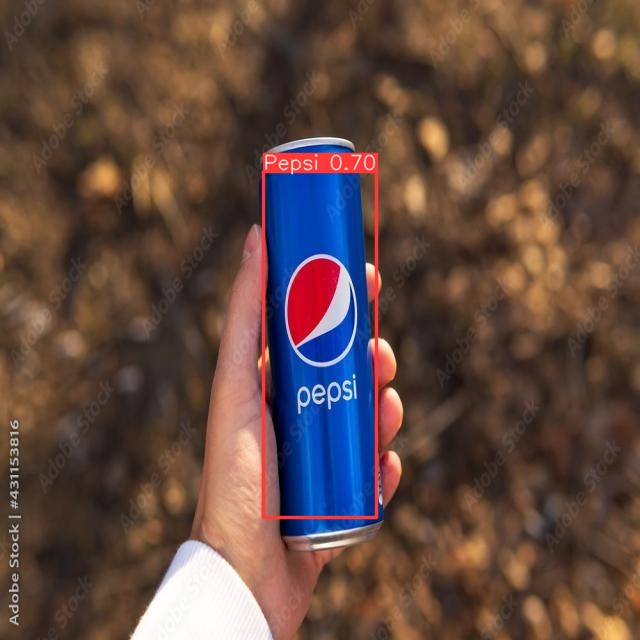

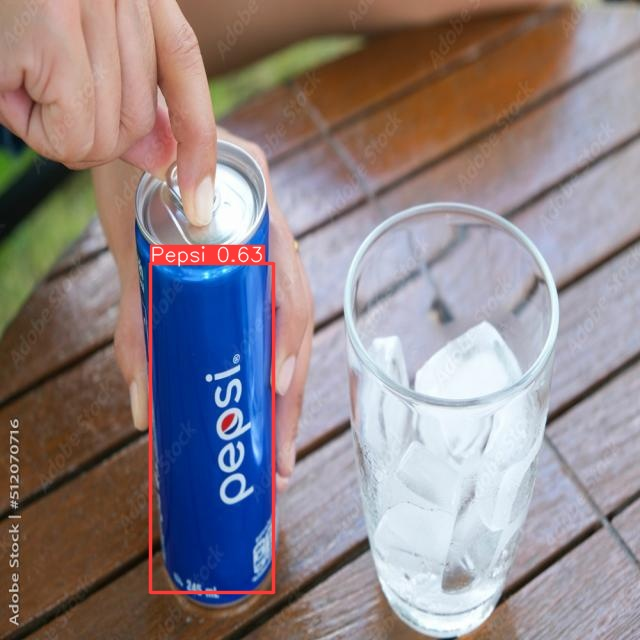

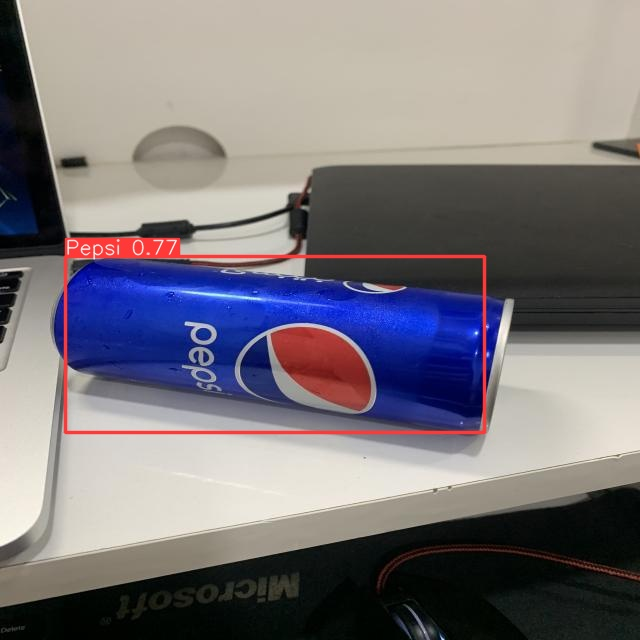

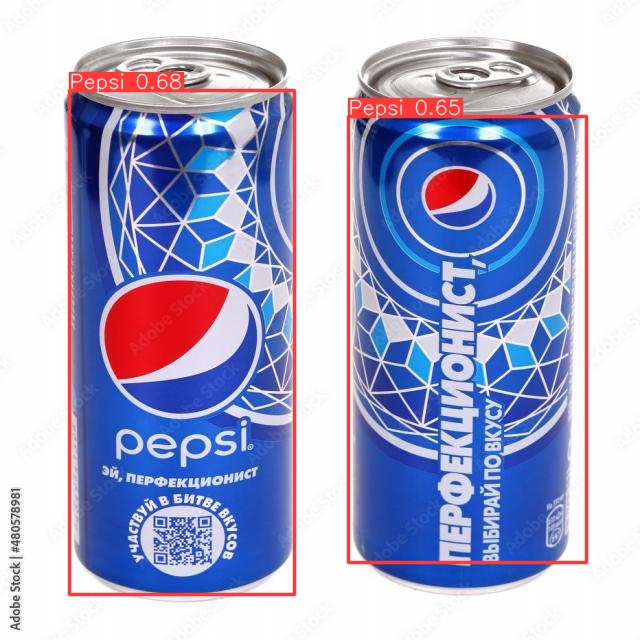

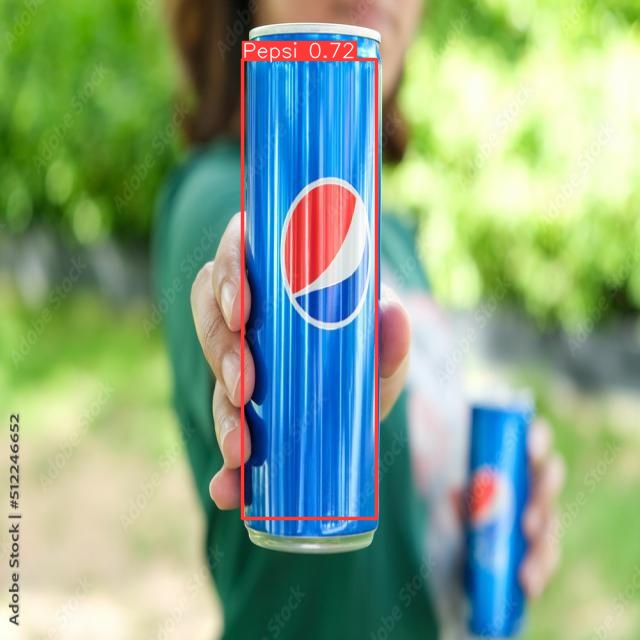

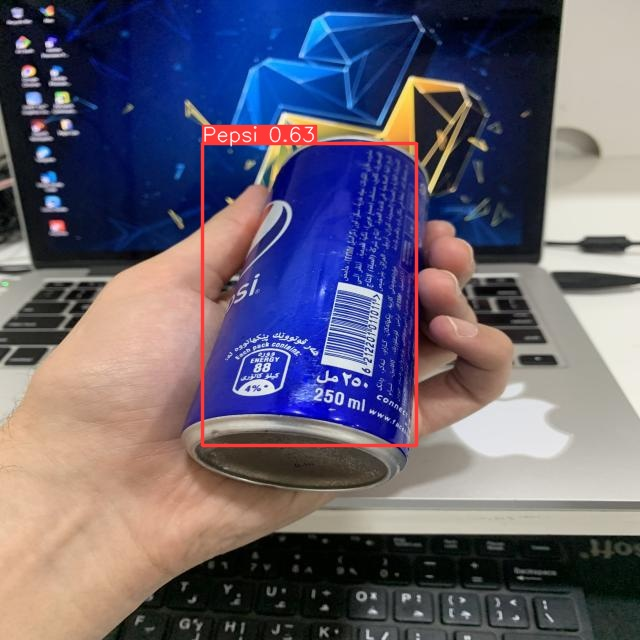

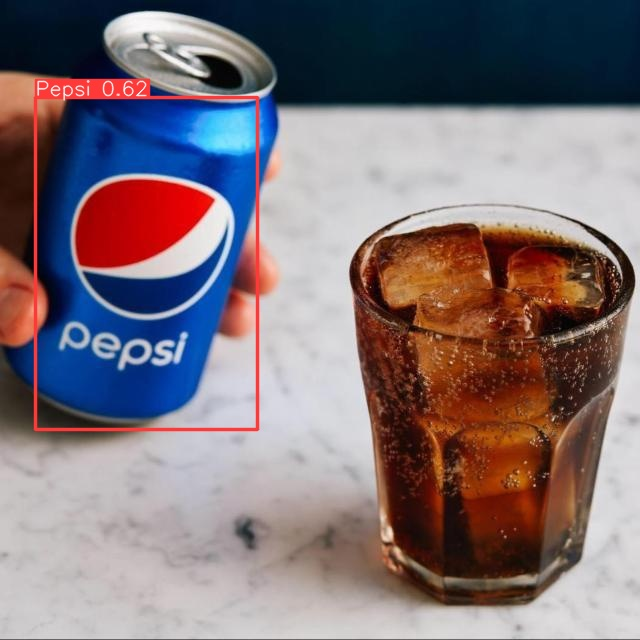

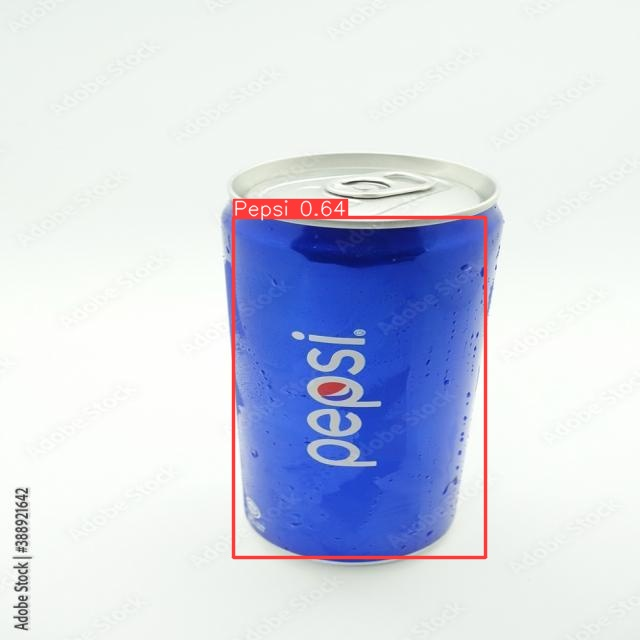

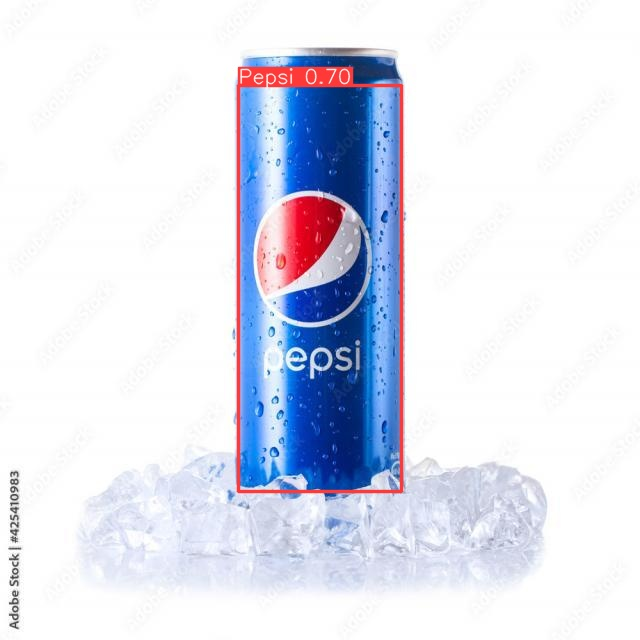

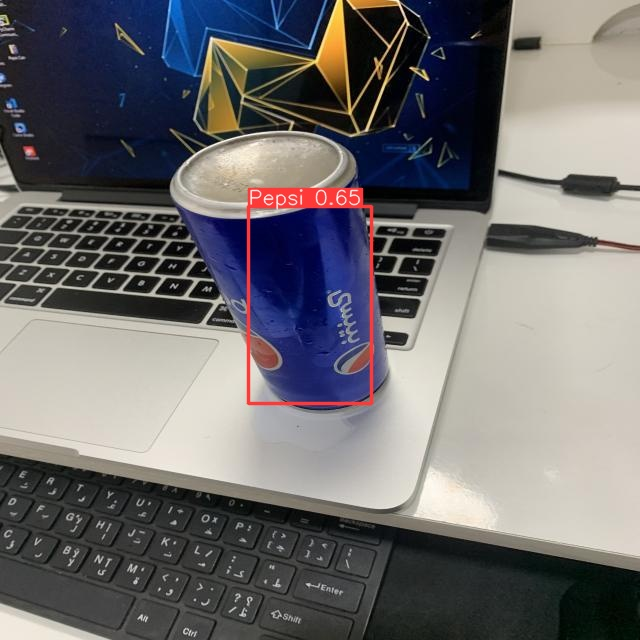

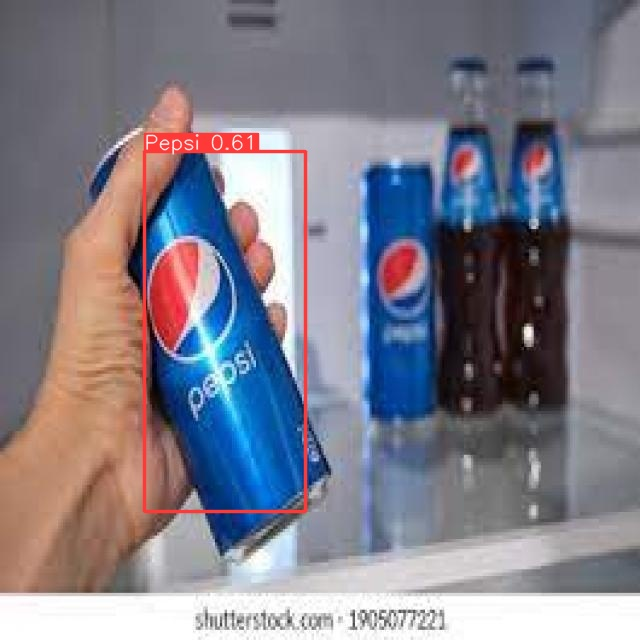

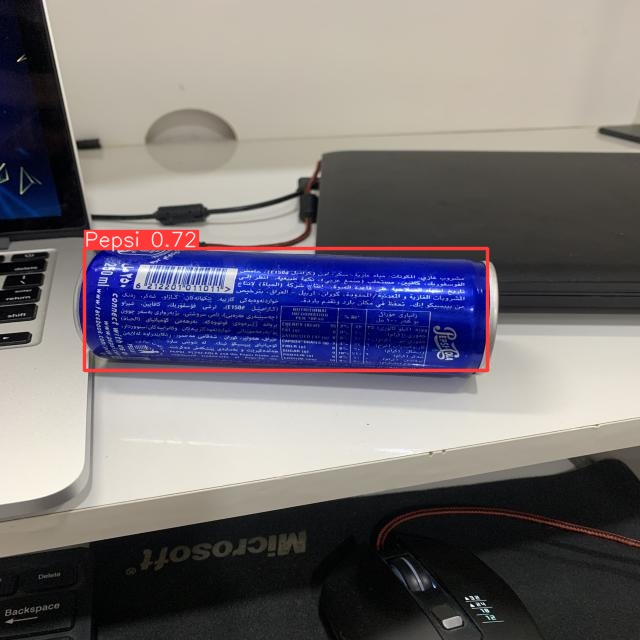

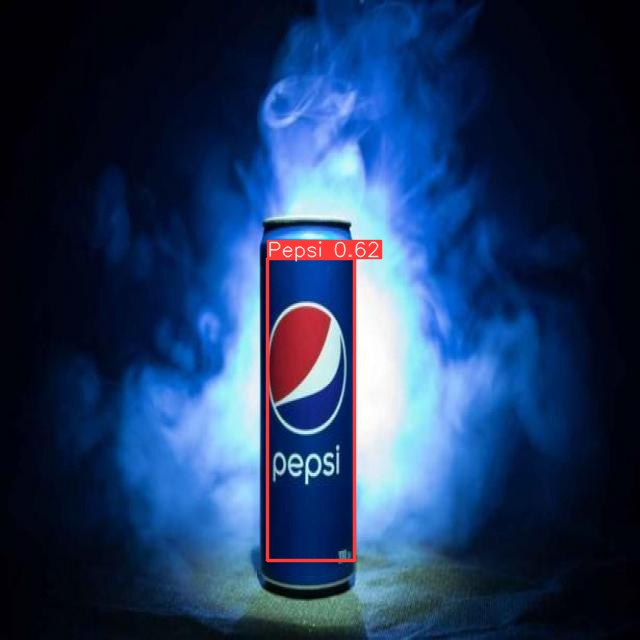

In [10]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [13]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model(source='/content/shutterstock_1481415659.jpg', show=True, conf=0.3, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/shutterstock_1481415659.jpg: 448x640 1 Pepsi, 28.0ms
Speed: 2.2ms preprocess, 28.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
